In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Q1
#read articleInfo.csv
df_1 = pd.read_csv("articleInfo.csv")
df_1

#read authorInfo.csv
df_2 = pd.read_csv("authorInfo.csv")
df_2

#merge two csv using Article No. into one dataframe
df_merged = pd.merge(df_1, df_2, how='left', on='Article No.')

#fill all empty cells with 0, inplace to persist changes in dataframe, downcast = integer
df_merged.fillna(0, inplace=True, downcast='infer')

#Print the head table
df_merged.head()
df_merged


,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type,Author Name,Author Affiliation,Country,h-index
0,1,Study of Virtual Reality Immersive Technology ...,2022,3,"virtual reality technologies, mathematics lear...",7,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Yu-Sheng Su,National Taiwan Ocean University,Taiwan,0
1,1,Study of Virtual Reality Immersive Technology ...,2022,3,"virtual reality technologies, mathematics lear...",7,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Hung-Wei Cheng,National Taiwan Ocean University,Taiwan,0
2,1,Study of Virtual Reality Immersive Technology ...,2022,3,"virtual reality technologies, mathematics lear...",7,FRONTIERS IN PSYCHOLOGY,Mathematics is an important foundation for the...,Journal,Chin-Feng Lai,National Cheng Kung University,Taiwan,0
3,2,Factors Influencing Nursing Students' Immersiv...,2021,2,virtual reality; learning; immersive media tec...,3,SENSORS,Background/objectives: This study aims to iden...,Journal,Youngju Kim,Daejeon Health Institute of Technology,Korea,0
4,2,Factors Influencing Nursing Students' Immersiv...,2021,2,virtual reality; learning; immersive media tec...,3,SENSORS,Background/objectives: This study aims to iden...,Journal,Sung Yun Ahn,Pai Chai University,Korea,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,160,Virtual reality enhances safety training in th...,2022,2,non-WEIRD sample; safety training; simulation;...,3,Journal of Computer Assisted Learning,Objective: Many industries struggle with train...,Journal,0,0,0,0
467,161,Virtual reality for developing intercultural c...,2022,3,Affective domain; Cultural competence; Instruc...,1,Educational Technology Research & Development,Intercultural communicative competence (ICC) i...,Journal,0,0,0,0
468,162,Virtual reality in problem-based learning cont...,2021,3,English learning; motivation; problem-based le...,27,Journal of Computer Assisted Learning,Learning a foreign language requires interacti...,Journal,0,0,0,0
469,163,Virtual reality is more efficient in learning ...,2020,8,Virtual reality; Education; Human heart anatomy,36,New Ideas in Psychology,New technologies make their way into education...,Journal,0,0,0,0


C:\Users\chris\AppData\Local\Temp\ipykernel_8936\1825228641.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = df_merged.groupby("Year")["Article No."].nunique()[1:]


Text(0.5, 1.0, 'yearly_publication')

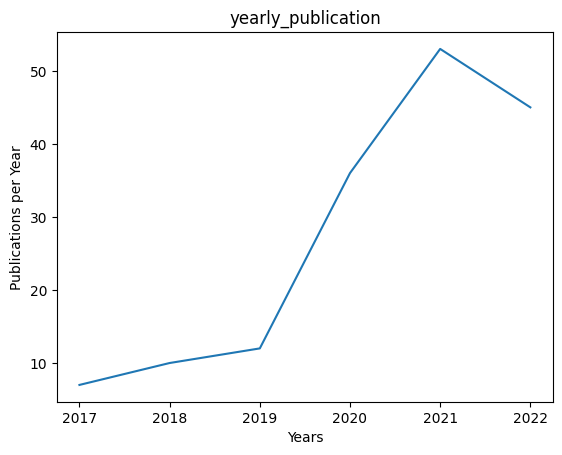

In [310]:
'''
Q1-1: Plot the yearly_publication figure, in which the x-axis is the year, the y-axis is
the number of articles published during that year.
'''

#x-axis = years 
x = df_merged["Year"].unique()
x = sorted(x)[1:]

#Sort by earliest to latest years
y = df_merged.groupby("Year")["Article No."].nunique()[1:]

#Plot 
plt.plot(x,y)

#Labeling graphs
plt.xlabel("Years")
plt.ylabel("Publications per Year")
plt.title("yearly_publication")

C:\Users\chris\AppData\Local\Temp\ipykernel_8936\583727390.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y = df_merged.groupby(by=["Year"]).sum()["Citation"]
C:\Users\chris\AppData\Local\Temp\ipykernel_8936\583727390.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y[1:]


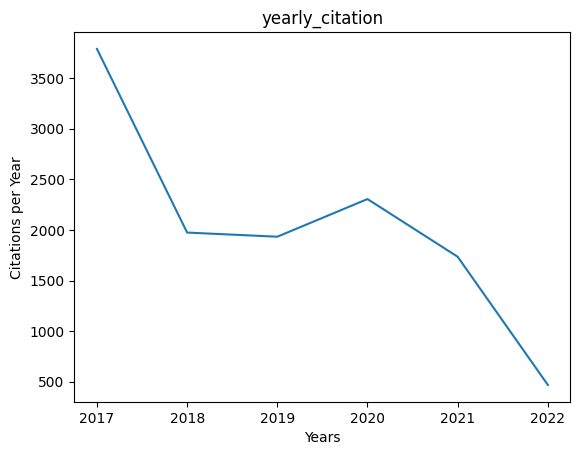

In [311]:
'''
Q1-2: Plot the yearly_citation figure, in which the x-axis is the year, the y-axis is the
total number of citations during that year.
'''

#x-axis = years
x = df_merged["Year"].unique()
x = sorted(x)[1:]

#y-axis = total citation per year
y = df_merged.groupby(by=["Year"]).sum()["Citation"]
y = y[1:]


#Labeling graphs
plt.xlabel("Years")
plt.ylabel("Citations per Year")
plt.title("yearly_citation")

#Plot
plt.plot(x,y)

Text(0.5, 1.0, 'Number of Publication across Countries')

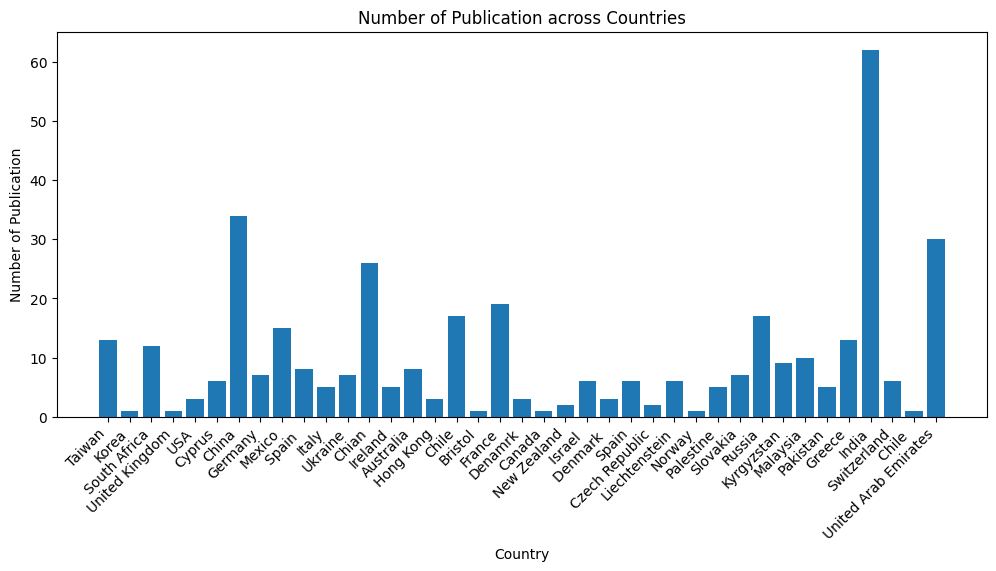

In [312]:
'''
Q1-3:Plot the figure of the number of publications across countries.
'''
# x-axis = country
countries = df_merged["Country"].unique()
x = countries.astype(str)
x = np.delete(x, np.where(x == '0'))

#y-axis = num of publications
y = df_merged.groupby(by=["Country"]).count()["Title"]
#drop the row with zero
y = y.drop(y.index[0]).values


plt.figure(figsize=(12, 5))
plt.xticks(rotation=45, ha="right")
plt.bar(x,y)

plt.xlabel("Country")
plt.ylabel("Number of Publication")
plt.title("Number of Publication across Countries")



In [313]:
'''
Q1-4: What are the top 5 institutions that have the most published articles in this
area?
'''

top_5_institutions = df_merged.groupby(by=["Author Affiliation"]).count()
top_5_institutions["Author Name"].nlargest(n=6)[1:]


Author Affiliation
University of the Western Cape    17
Masaryk University                12
Intel Corporation                 11
University College Cork           11
Madigan Army Medical Center        8
Name: Author Name, dtype: int64

In [314]:
'''
Q1-5: Who are the top 5 researchers that have the most h-index in this area?
'''
#top_5_researchers = df_merged.groupby(by=["Author Name"]).unique().sum()
#top_5_researchers["h-index"].nlargest(n=5)
top_5_researchers = df_merged.sort_values('h-index', ascending=False)
top_5_researchers.iloc[:, [9,-1]].head()





,Author Name,h-index
117,Ulrich Trautwein,95
102,Nicolas Molinari,63
130,George S. Athwal,59
147,Vicente A. González,33
140,Maria Luisa Lorusso,33


In [315]:
#Q2
#Read data.csv and drop teh empty column
df_data = pd.read_csv("data.csv")
df_data = df_data.drop(columns="Unnamed: 6")
df_data = df_data.fillna(0)

df_data

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error
0,1,84,254,0,3,2
1,0,58,247,0,6,9
2,0,56,125,1,6,8
3,0,55,22,0,11,7
4,1,95,262,0,2,3
...,...,...,...,...,...,...
95,0,57,358,0,13,7
96,1,93,71,0,3,0
97,0,80,34,1,0,9
98,1,82,49,1,4,1


In [316]:
#Compute Pair-wise correlations
print(df_data.corr(method='pearson')['SUS'].sort_values())

# Independent = All other Values
# Dependent = SUS
X = df_data.drop(['SUS'], axis=1)
Y = df_data['SUS']

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64


In [317]:
#OLS: Ordinary Least Square Regression

import statsmodels.api as sm

# Independent = All other Values
# Dependent = SUS
X = df_data.drop(['SUS'], axis=1)
Y = df_data['SUS']

#add constant to predictor variables
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        15:51:29   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

In [318]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

# Independent = All other Values
# Dependent = SUS
X = df_data.drop(['SUS'], axis=1)
Y = df_data['SUS']

# (X_Train, Y_train), (X_test, Y_test)
#Train data = use to train machine
#Test data = use to check accuracy of model
# test_size = 0.2 (20% Test data and 80% Training data)
#Regression Analysis
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,)


In [319]:
#Linear Regression model = Training 
model = LinearRegression().fit(X_train,Y_train)

#Y prediction use the X_Train values with the models
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [320]:
#R Squared value of the linear regression model 
score_1 = model.score(X_test, Y_test)
print("The R square score of linear regression model is: ", score_1)


The R square score of linear regression model is:  0.6745785355280103


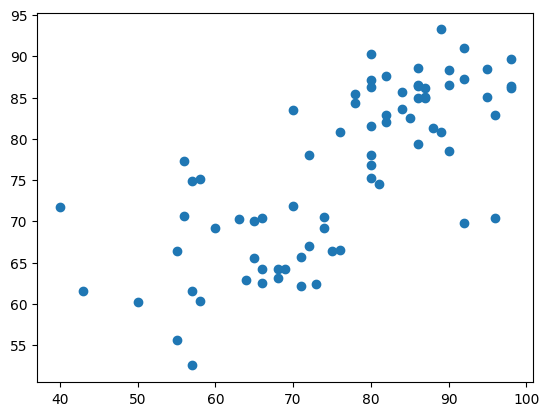

In [321]:
plt.scatter(Y_train, y_train_pred)

In [322]:
#2 Order Polynomials

# Independent = All other Values
# Dependent = SUS
X = df_data.drop(['SUS'], axis=1)
Y = df_data['SUS']

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print("The R square score of 2-order polynomial regression model is: ", plr.score(X_test,Y_test))

The R square score of 2-order polynomial regression model is:  0.522049850343024


In [323]:
#Q3
from sklearn.preprocessing import StandardScaler

y = df_data['Purchase'].to_numpy()
X = df_data.drop(['Purchase', 'SUS'], axis = 1).to_numpy()

# Data Scaling
scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [324]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

In [325]:
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              preci